(ch:probability-multivariate)=
# 다변량 분포 (준비중)

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

**연속 다변량 분포**<font size='2'>multivariate distribution</font>는
여러 개의 연속 확률 변수들이 결합된 확률 분포다.
여기서는 두 개의 연속 확률 변수가 결합된 다변량 분포를 소개한다.

## 연속 결합 확률 분포

$X$, $Y$ 두 개의 연속 확률 변수가 주어졌을 때 $(X, Y)$는 각각의 확률 변수가 취할 수 있는 값들의 조합을 가리키는 결합 확률 변수다.
$(X, y)$가 특정 영역에서 발생할 가능성의 확률 분포를
**연속 결합 확률 분포**<font size='2'>continuous joint probability distribution</font>라 부르며
$X$가 $a$에서 $b$ 사이에서, $Y$가 $c$에서 $d$ 사이에서 값을 취할 확률은

$$
P(a \le X \le b, c \le Y \le d) = p
$$

로 표현된다.
경우에 따라 아래처럼 표현되기도 한다.

$$
P(a \le X \le b \;\cap\; c \le Y \le d) = p
$$

또는

$$
P(a \le X \le b\;\;\text{and}\;\; c \le Y \le d) = p
$$

**예제: 캘리포니아 구역별 중위소득과 중위주택가격의 결합 확률 분포**

$X$가 캘리포니아의 구역별 중위소득을,
$Y$가 캘리포니아의 구역별 중위주택가격을 가리키는 확률 변수라 하자.
임의로 선택된 구역의 중위소득과 중위주택가격이 각각 특정 영역에 포함될 확률을
계산하는 연속 결합 확률 분포를 
부울 인덱싱을 이용하여 정의할 수 있다.

아래 코드는 캘리포니아 주택가격 데이터셋을 불러온 후에
중위주택가격이 50만을 초과하는 경우는 삭제하고 인덱스를 초기화한다.
최종적으로 중위소득과 중위주택가격 두 특성만 남긴다.

중위주택가격이 소수점 이하는 모두 0이라 정수로, 즉 이산형으로 간주할 수도 있지만 여기서는 단순하게 부동소수점으로,
즉 연속형 자료형으로 다룬다.

In [10]:
housing = pd.read_csv(data_url+"california_housing.csv")

# 중위주택가격이 50만1달러 이상인 구역 삭제
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

# 인덱스 초기화
housing = housing.reset_index(drop=True)

# 중위소득 특성만 선택
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


임의로 선택된 구역의 중위소득은 3.0에서 4.5 사이에,
중위주택가격은 15만에서 25만 사이에 위치할 확률을 계산하기 위해 부을 마스크를 지정한다.

In [56]:
a = 3.0
b = 4.5
c = 150_000
d = 250_000

mask_X = (a <= housing.median_income) & (housing.median_income <= b)
mask_Y = (c <= housing.median_house_value) & (housing.median_house_value <= d)

`pd.crosstab()` 함수를 이용하면 `True`와 `False`의 조합의 도수로 구성된
`2x2` 행렬 모양의 데이터프레임이 생성된다.

In [47]:
pd.crosstab(mask_X, mask_Y)

median_house_value,False,True
median_income,,
False,8610,3924
True,3763,3378


각각의 경우의 상대도수를 편하게 계산하기 위해 `margins=True` 키워드 인자를 지정하는 게 좋다.

In [39]:
pd.crosstab(mask_X, mask_Y, margins=True)

median_house_value,False,True,All
median_income,,,
False,8610,3924,12534
True,3763,3378,7141
All,12373,7302,19675


그러면 두 특성이 각각 지정된 구간에 포함될 확률은 두 특성이 모두
`True`인 칸에 위치한 값 0.171690, 즉 약 17.2% 정도로 계산된다.
아래 코드에서 19,675는 전체 경우의 수를 가리킨다.

In [41]:
pd.crosstab(mask_X, mask_Y, margins=True) / 19675

median_house_value,False,True,All
median_income,,,
False,0.437611,0.199441,0.637052
True,0.191258,0.171690,0.362948
All,0.628869,0.371131,1.000000


참고로 언급된 두 구간은 {numref}`%s장 <ch:probability-discrete>`에서 각각 중위소득 3구간,
중위주택가격 4구간으로 지정되었으며
당시 이산 결합 확률 변수가 각각의 구간에 속할 확률은 0.169911, 즉 약 17%로 계산되었다.

차이가 발생하는 이유는 캘리포니아 주택 데이터셋은 유한 개의 데이터만 포함하기에
확률 변수가 특정 실수를 가질 확률이 0이 아니기 때문이다.
실제로 중위소득이 3.0일 확률이 0이 아니다.

In [45]:
mask3 = housing.median_income == 3.0
mask3.mean()

0.001931

이 점을 고려해서 `mask_X`와 `mask_Y`의 {numref}`%s장 <ch:probability-discrete>` 에서 사용한 구간과 동일하게 지정하면,
즉, 구간의 왼쪽 끝을 제외시키면 결과가 0.169911로 이산 결합 확률 분포의 경우와 동일하게 나온다.

In [49]:
mask_X = (a < housing.median_income) & (housing.median_income <= b)
mask_Y = (c < housing.median_house_value) & (housing.median_house_value <= d)
pd.crosstab(mask_X, mask_Y, margins=True) / 19675

median_house_value,False,True,All
median_income,,,
False,0.441017,0.197967,0.638983
True,0.191105,0.169911,0.361017
All,0.632122,0.367878,1.000000


그럼에도 불구하여 여기서는 연속 결합 확률 분포를 계산하기에 구간의 왼쪽 끝을 포함하면서
결합 확률을 계산한다.

**결합 확률 분포 함수**

앞서 사용한 예제를 일반화하여
중위소득은 $a$와 $b$ 사이에서, 
중위주택가격은 $c$와 $d$ 사이에서
값을 가질 확률을 계산하는 결합 확률 분포 함수를 
다음과 같이 두 개의 부울 마스크를 이용하여 선언한다.

In [52]:
mask_X = (a <= housing.median_income) & (housing.median_income <= b)
mask_Y = (c <= housing.median_house_value) & (housing.median_house_value <= d)
cross_XY = pd.crosstab(mask_X, mask_Y, margins=True)
total = cross_XY.loc['All', 'All']
cross_XY_prob = cross_XY / total

In [53]:
cross_XY_prob

median_house_value,False,True,All
median_income,,,
False,0.437611,0.199441,0.637052
True,0.191258,0.171690,0.362948
All,0.628869,0.371131,1.000000


In [58]:
def p_XY(a, b, c, d):
    mask_X = (a <= housing.median_income) & (housing.median_income <= b)
    mask_Y = (c <= housing.median_house_value) & (housing.median_house_value <= d)
    cross_XY = pd.crosstab(mask_X, mask_Y, margins=True)
    total = cross_XY.loc['All', 'All']
    cross_XY_prob = cross_XY / total
    return cross_XY_prob.loc[True, True]

중위소득은 3구간에, 중위주택가격은 4구간에 속할 확률이
이전과 동일하게 확인된다.

In [59]:
p_XY(a, b, c, d)

0.171690

**결합 확률 분포 함수의 성질**

두 확률 변수가 취할 수 있는 전 영역에서의 결합 확률은 1이다.

In [60]:
p_XY(-np.inf, np.inf, -np.inf, np.inf)

1.000000

(sec:kde-multivariate)=
## 다변량 커널 밀도 추정

데이터셋이 주어졌을 때
**커널 밀도 추정**<font size='2'>kernel density estimation</font>(KDE) 기법을 이용하여
결합 확률 분포 함수를 구할 수 있다.
여기서는 캘리포니아 데이터셋의 중위소득과 중위주택가격의 결합 확률 분포에 대한 확률 밀도 함수를
KDE에 기반하여 구현한다.

### 결합 확률 밀도 함수

연속 확률 변수 $X$에 대한 누적 분포 함수 $F(a)$를 계산할 때
확률 밀도 함수의 적분으로 계산하였다.

$$
F(a) = P(X \le a) = \int_{-\infty}^{a} f(x)\; dx
$$

단변량 누적 분포 함수를 계산할 때처럼
$(X, Y)$ 결합 확률 변수에 대한 결합 확률 분포 함수도 결합 확률 밀도 함수의 적분으로 계산할 수 있다.
단, 결합 확률 밀도 함수 $f(x, y)$는 항상 음이 아닌 실수이어야 한다.

$$
P(a \le X \le b, c \le Y \le d) = \int_{a}^{b} \int_{c}^{d} f(x, y)\; dx\, dy
$$

**`scipy.stats` 모듈**

`scipy.stats` 모듈의 `gaussian_kde()` 함수가 
커널 밀도 추정(KDE) 기법을 적용하여
결합 확률 분포에 대해서도 확률 밀도 함수를 계산한다.

In [89]:
import scipy.stats

In [98]:
m1 = housing.median_income.to_numpy()
m2 = housing.median_house_value.to_numpy()

In [101]:
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [102]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = scipy.stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

In [250]:
positions

array([[4.99900e-01, 4.99900e-01, 4.99900e-01, ..., 1.50001e+01,
        1.50001e+01, 1.50001e+01],
       [1.49990e+04, 1.98980e+04, 2.47970e+04, ..., 4.90202e+05,
        4.95101e+05, 5.00000e+05]])

In [252]:
kernel([[3.0], [200000]])

array([1.008746e-06])

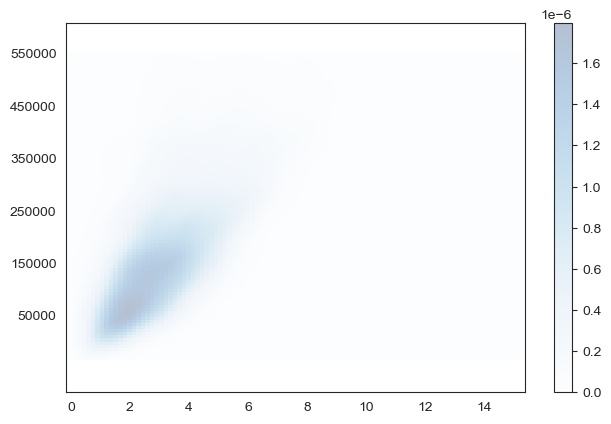

In [246]:
fig, ax = plt.subplots(figsize=(7.4, 4.8))

axImages = plt.imshow(np.rot90(Z), cmap='Blues', alpha=.3, aspect='auto')
# ax.plot(m1, m2, 'k.', markersize=2)

ax.set_xlim([-1, 100])
ax.set_ylim([-10, 110])

ax.set_xticks(range(0, 104, 13))
ax.set_xticklabels(range(0, 16, 2))

ax.set_yticks(range(0, 100, 17))
ax.set_yticklabels(range(550_000, -1, -100_000))

ax.yaxis.set_inverted(True)

plt.colorbar(axImages, ax=ax)

plt.show()

In [232]:
# f_XY = scipy.stats.gaussian_kde(housing)

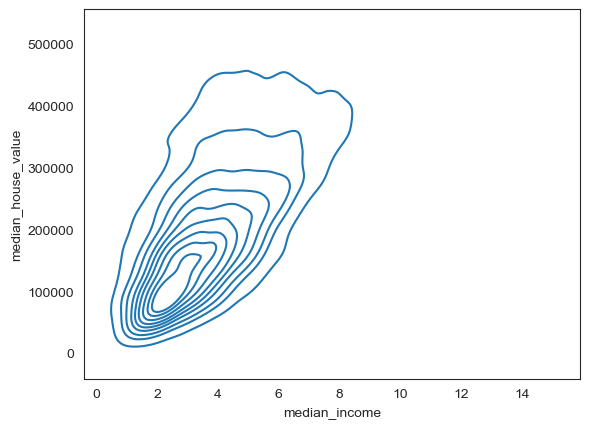

In [233]:
fig, ax = plt.subplots()

# 추정된 확률 밀도 함수 그래프
sns.kdeplot(ax = ax, data=housing, x="median_income", y="median_house_value")
# ax.plot(m1, m2, 'k.', markersize=2)

plt.show()

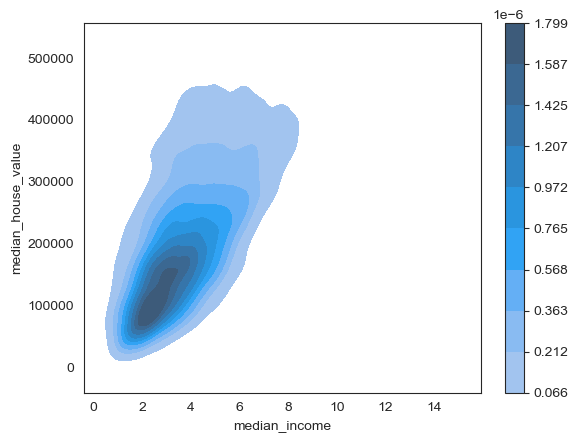

In [158]:
fig, ax = plt.subplots()

# 추정된 확률 밀도 함수 그래프
sns.kdeplot(ax = ax, data=housing, x="median_income", y="median_house_value", fill=True, cbar=True)

plt.show()

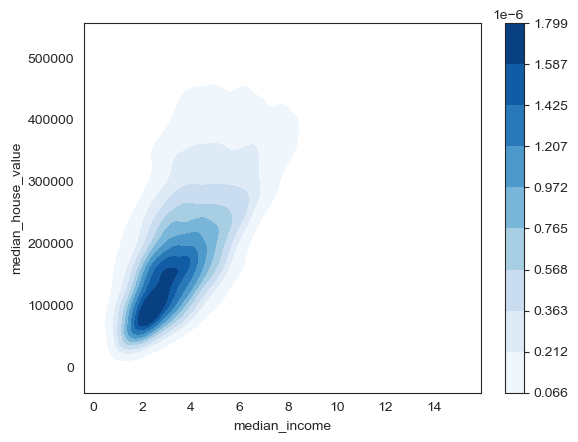

In [156]:
fig, ax = plt.subplots()

# 추정된 확률 밀도 함수 그래프
sns.kdeplot(ax = ax, data=housing, x="median_income", y="median_house_value", fill=True, cmap='Blues', cbar=True)

plt.show()

### 확률 밀도 함수 적분

**scipy.integrate 모듈**

정적분을 프로그래밍으로 직접 구현하는 일은 간단하지 않기에 
통계 관련 전문 라이브러리인 SciPy 라이브러리의 `integrate` 모듈에
포함된 `quad()` 함수를 이용한다.

In [38]:
from scipy.integrate import quad

:::{admonition} `scipy.integrate.quad()` 함수
:class: note

`quad()` 함수는 단변수 함수의 정적분을 계산한다.
함수에 사용된 알고리즘은 Fortran 이라는 계산 전용 프로그래밍언어을 위해
개발된 QUADPACK에 포함된 기능을 활용한다.
그래서 함수의 이름도 `quad()` 정해진 것으로 알려졌다.
:::

아래 코드는 중위소득의 범위에서 `f_income()` 함수를 정적분한 결과를 보여준다.
`quad()` 함수는 정적분값과 함께 계산된 값과 실제 값 사이의 오차를 함께 반환한다.

In [39]:
quad(f_income, housing.min(), housing.max())

(0.998388, 0.000000)

여기서는 `f_income()` 함수를 정적분했을 때
임의로 선택된 구역의 중위소득이 지정된 구간 안에 포함될 확률의 추정치가 계산되는가를
확인하고자 하기에 따라서 오차는 무시한다.

아래 `P_estimate()` 함수는 `quad()` 함수를 이용하여 $P(a \le X \le b)$를 추정하는 함수다.
즉, 앞서 정의한 `P_income()` 함수의 추정 함수다.

In [40]:
def P_estimate(a, b):
    p, _ = quad(f_income, a, b)
    return p

실수 전체 영역에서는 확률이 1이다.

In [41]:
P_estimate(-np.inf, np.inf)

1.000000

중위소득 범위에서의 확률은 1보다 아주 조금 작다.
이유는 앞서 추정된 확률 밀도 함수의 그래프에서 보았듯이
데이터 분포의 영역 밖에서도 확률 밀도가 0보다 큰 영역이 존재하기 때문이다.
KDE 기법이 원래 그렇게 작동한다.

In [42]:
P_estimate(housing.min(), housing.max())

0.998388

중위소득 범주가 2일 확률, 즉 중위소득이 1.5에서 3.0 사이에 위치할 확률은 다음과 같다.

In [43]:
P_estimate(1.5, 3.0)

0.329210

앞서 데이터로부터 직접 계산된 `P_income()` 함수가 계산한 확률과는 역시 약간의 오차만큼 작다.

In [44]:
P_income(1.5, 3.0)

0.333011

`P_estimate()` 함수의 첫째 인자를 음의 무한대로 지정하면 
앞서 정의한 누적 분포 함수인 `F_income()`과 유사한 값을 계산한다.
예를 들어 중위소득이 3.7 이하일 확률의 추정값은 다음과 같다.

In [45]:
P_estimate(-np.inf, 3.7)

0.561979

반면에 실제 확률은 다음과 같이 조금 더 크다.

In [46]:
F_income(3.7)

0.567217

## 연습문제

참고: [(연습) 다변량 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-probability_multivariate.ipynb)